<a href="https://colab.research.google.com/github/Harish7783/netflix-bussiness-case/blob/main/netflix_bussiness_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/netflix.csv')

In [ ]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape


(8807, 12)

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Splitting the directors by title

In [ ]:
df_director_r=pd.DataFrame(df['director'].apply(lambda x: str(x).split(',')).tolist(),index=df['title'])

In [ ]:
df_director=df_director_r.stack().reset_index()
df_director.drop('level_1',axis=1,inplace=True)
df_director.rename(columns = {0:'director'},inplace= True)
df_director.head(5)

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


Splitting cast by title

In [ ]:
df_cast_r=pd.DataFrame(df['cast'].apply(lambda x: str(x).split(',')).tolist(),index=df['title'])

In [ ]:
df_cast=df_cast_r.stack().reset_index()
df_cast.drop('level_1',axis=1,inplace=True)
df_cast.rename(columns = {0:'cast'},inplace= True)
df_cast.head(5)

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


Splitting country by tittle

In [ ]:
df_country_r=pd.DataFrame(df['country'].apply(lambda x: str(x).split(',')).tolist(),index=df['title'])
df_country=df_country_r.stack().reset_index()
df_country.drop('level_1',axis=1,inplace= True)
df_country.rename(columns={0:'country'},inplace=True)
df_country.head(5)


,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


Splitting listed_in by title

In [ ]:
df_listed_in_r=pd.DataFrame(df['listed_in'].apply(lambda x: str(x).split(',')).tolist(),index=df['title'])
df_listed_in=df_listed_in_r.stack().reset_index()
df_listed_in.drop('level_1',axis=1,inplace=True)
df_listed_in.rename(columns={0:'listed_in'},inplace=True)
df_listed_in.head(5)

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [ ]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Merging the columns


In [ ]:
df_new1=df_director.merge(df_cast,how='inner',on = 'title')
df_new1
df_new2=df_listed_in.merge(df_country,how='inner',on='title')
df_new2
df_new=df_new1.merge(df_new2,how= 'inner',on='title')
df_new.head(5)

,title,director,cast,listed_in,country
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Creating the df_final DataFrame

In [ ]:
df_final=df_new.merge(df[['show_id', 'type', 'title',  'date_added',
       'release_year', 'rating', 'duration', 'description']],how='inner',on='title')
df_final.sample(5)

,title,director,cast,listed_in,country,show_id,type,date_added,release_year,rating,duration,description
63532,Middleditch & Schwartz,Ryan Polito,Ben Schwartz,TV Comedies,United States,s2660,TV Show,"April 21, 2020",2020,TV-MA,1 Season,Comedy duo Thomas Middleditch and Ben Schwartz...
28961,Philomena,Stephen Frears,Anna Maxwell Martin,Dramas,United States,s1176,Movie,"March 22, 2021",2013,PG-13,98 min,A kind-hearted Irishwoman teams with an acerbi...
40937,The Life Ahead,Edoardo Ponti,Abril Zamora,Dramas,Italy,s1706,Movie,"November 13, 2020",2020,PG-13,95 min,A Holocaust survivor running a daycare busines...
7156,Navarasa,Rathindran R Prasad,Ashok Selvan,TV Shows,India,s298,TV Show,"August 6, 2021",2021,TV-MA,1 Season,"From amusement to awe, the nine human emotions..."
120804,Much Loved,Nabil Ayouch,Abdellah Didane,Dramas,Morocco,s5261,Movie,"September 27, 2017",2015,TV-MA,104 min,Four friends who make their living as prostitu...


Replacing 'Nan' values with Unknown

In [ ]:
df_final['director'].replace(['nan'],['Unknown Director'],inplace = True)
df_final['cast'].replace(['nan'],['Unknown Cast'],inplace = True)
df_final['date_added'].replace(['nan'],['Unknown Date'],inplace = True)
df_final['country'].replace(['nan'],['Unknown Country'],inplace=True)

df_final.head(5)

,title,director,cast,listed_in,country,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


Checking for null values

In [ ]:
df_final[df_final['duration'].isnull()]

,title,director,cast,listed_in,country,show_id,type,date_added,release_year,rating,duration,description
126582,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,"April 4, 2017",2017,74 min,NaN,"Louis C.K. muses on religion, eternal love, gi..."
131648,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,"September 16, 2016",2010,84 min,NaN,Emmy-winning comedy writer Louis C.K. brings h...
131782,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,"August 15, 2016",2015,66 min,NaN,The comic puts his trademark hilarious/thought...


In [ ]:
df_final[df_final['duration'].isnull()]

,title,director,cast,listed_in,country,show_id,type,date_added,release_year,rating,duration,description
126582,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,"April 4, 2017",2017,74 min,NaN,"Louis C.K. muses on religion, eternal love, gi..."
131648,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,"September 16, 2016",2010,84 min,NaN,Emmy-winning comedy writer Louis C.K. brings h...
131782,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,"August 15, 2016",2015,66 min,NaN,The comic puts his trademark hilarious/thought...


In [ ]:
import pandas as pd

df_final['duration'] = df_final['duration'].fillna(df_final['rating'])


df_final.loc[126582, 'rating'] = "unknown rating"
df_final.loc[131648, 'rating'] = "unknown rating"
df_final.loc[131782, 'rating'] = "unknown rating"

In [ ]:
for ele in df_final[df_final['rating'].isnull()]:
    df_final['rating'] = df_final['rating'].fillna('unknown rating')


In [ ]:
for ele in df_final[df_final['date_added'].isnull()]:
    df_final['date_added'] = df_final['date_added'].fillna('unknown date')

Confirming no further nulls in the df_final

In [ ]:
df_final.isnull().sum()

title           0
director        0
cast            0
listed_in       0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
description     0
dtype: int64

Final data frame after cleaning as 'df_final'

In [ ]:
df_final.head()

,title,director,cast,listed_in,country,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Unknown Director,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Unknown Director,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Unknown Director,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Unknown Director,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


1. What type of content is available in different countries?

In [ ]:

type_uni=df_final['type'].nunique()
country_uni=df_final['country'].nunique()
print(f'The no.of unique values of type of content is :{type_uni} ')
print(f'The no.of unique country content :{country_uni} ')

The no.of unique values of type of content is :2 
The no.of unique country content :198 


In [ ]:
country_wise=df_final.groupby(['country'])['type'].value_counts()
country_wise_df=country_wise.reset_index(name='counts')
country_wise_df


country_wise_df.drop(columns=['counts'], inplace=True,errors='ignore')

country_wise_df = country_wise_df.groupby('country')['type'].apply(lambda x: ' & '.join(map(str, x))).reset_index()


def map_category(types):
    if 'Movie' in types and 'TV Show' in types:
        return 2
    elif 'Movie' in types:
        return 0
    elif 'TV Show' in types:
        return 1
    else:
        return None


country_wise_df['category'] = country_wise_df['type'].apply(map_category)

country_wise_df.drop(columns=['type'], inplace=True)
country_wise_df.rename(columns={'category': 'type'},inplace=True)
country_wise_df

,country,type
0,,2
1,Afghanistan,0
2,Albania,0
3,Algeria,0
4,Angola,0
...,...,...
193,Uruguay,2
194,Venezuela,0
195,Vietnam,0
196,West Germany,0


<ipython-input-369-8b268a122ddd>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


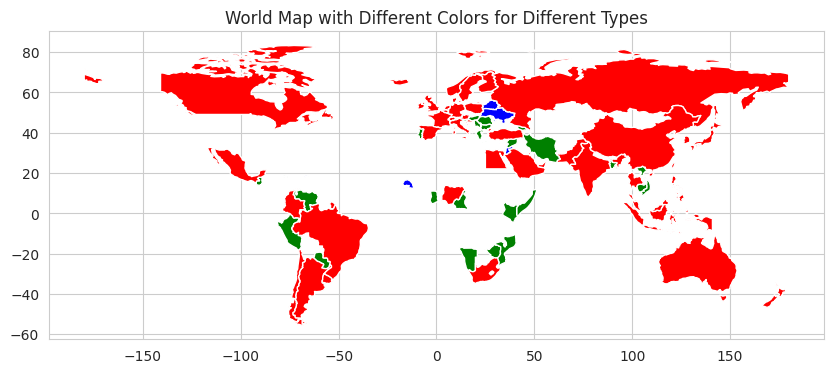

In [ ]:

import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(country_wise_df, how='left', left_on='name', right_on='country')

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

world[world['type'] == 0].plot(ax=ax, color='green', legend=True)

world[world['type'] == 1].plot(ax=ax, color='blue', legend=True)

world[world['type'] == 2].plot(ax=ax, color='red', legend=True)

ax.set_title('World Map with Different Colors for Different Types')
plt.show()

2. How has the number of movies released per year changed over the last 20-30 years?

In [ ]:

movies_yr = df_final[['title', 'type', 'release_year']].copy()
movies_yr.drop_duplicates(subset=['title'], inplace=True)
movies_yr.reset_index(drop=True, inplace=True)

movies_yr = movies_yr.groupby(['type', 'release_year']).size().reset_index(name='count')

movies_yr_df = movies_yr[movies_yr['type'] == 'Movie'].copy()

movies_yr_df.sort_values(by='release_year', inplace=True)

end_year = 2021
start_year = end_year - 30

movies_yr_df = movies_yr_df[
    (movies_yr_df['release_year'] >= start_year) &
    (movies_yr_df['release_year'] <= end_year)
]


movies_yr_df.head()

,type,release_year,count
42,Movie,1991,16
43,Movie,1992,20
44,Movie,1993,24
45,Movie,1994,20
46,Movie,1995,23


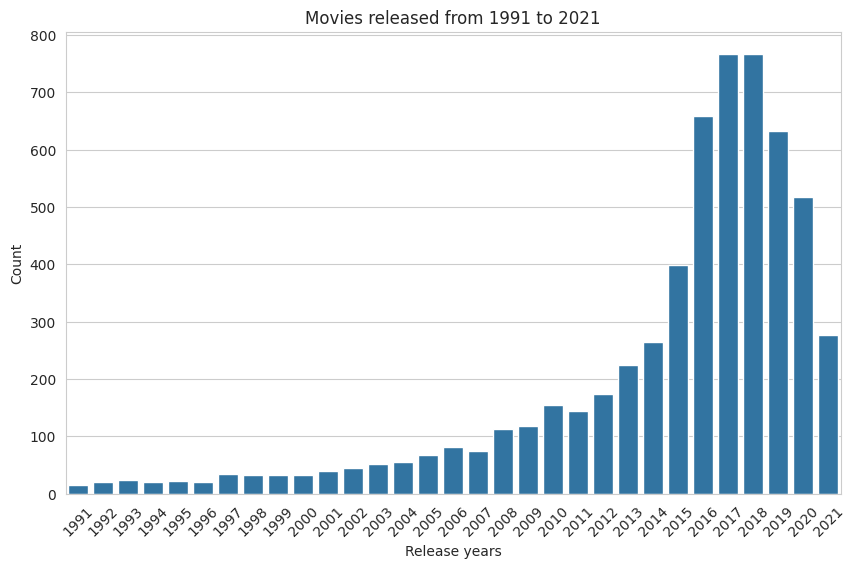

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='release_year',y='count',data=movies_yr_df)
plt.xlabel('Release years')
plt.ylabel('Count')
plt.title('Movies released from 1991 to 2021')
plt.xticks(rotation=45)
plt.show()


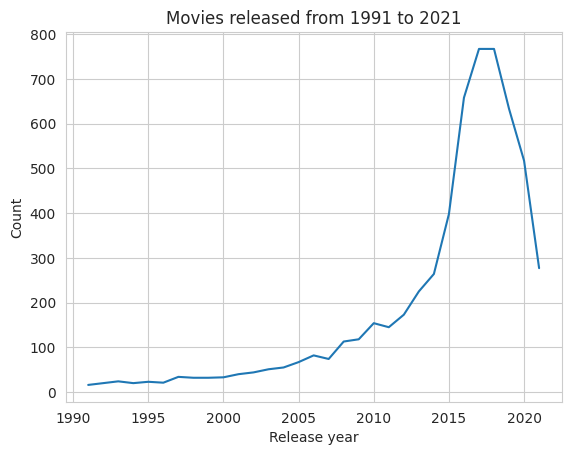

In [ ]:
sns.lineplot(x='release_year',y='count',data=movies_yr_df)
plt.title('Movies released from 1991 to 2021')
plt.xlabel('Release year')
plt.ylabel('Count')
plt.show()


3.Comparison of tv shows vs. movies.

In [ ]:

movie_shows = df_final[['title', 'type', 'release_year']].copy()

movie_shows.drop_duplicates(subset=['title'], inplace=True)

movie_shows = movie_shows.reset_index(drop=True)

movie_shows = movie_shows.groupby('type')['release_year'].value_counts()

movie_shows = movie_shows.reset_index(name='count')

movie_shows_df = movie_shows[movie_shows['type'] == 'Movie'].copy()

tv_shows_df = movie_shows[movie_shows['type'] == 'TV Show'].copy()

movie_shows_df.sort_values(by='release_year', inplace=True)
tv_shows_df.sort_values(by='release_year', inplace=True)

movie_shows_df.head(), tv_shows_df.head()

(     type  release_year  count
 62  Movie          1942      2
 59  Movie          1943      3
 58  Movie          1944      3
 56  Movie          1945      3
 68  Movie          1946      1,
         type  release_year  count
 107  TV Show          1925      1
 106  TV Show          1945      1
 108  TV Show          1946      1
 110  TV Show          1963      1
 111  TV Show          1967      1)

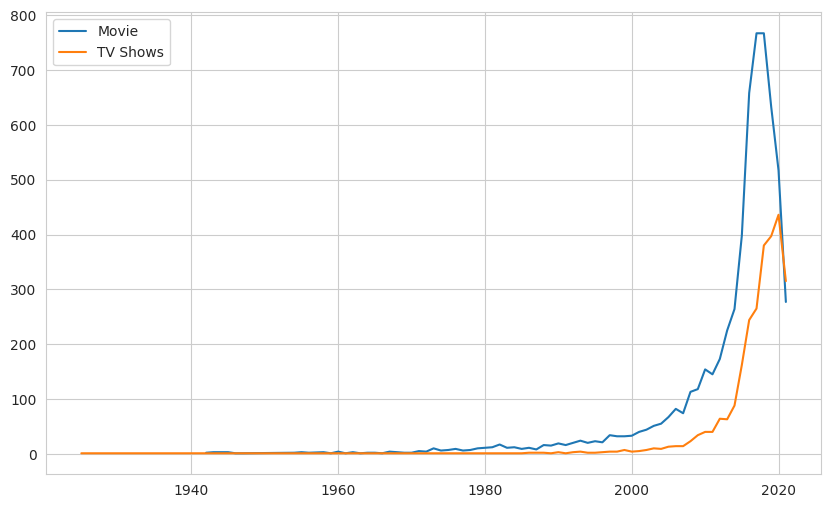

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(movie_shows_df['release_year'], movie_shows_df['count'], label='Movie')
plt.plot(tv_shows_df['release_year'], tv_shows_df['count'], label='TV Shows')

plt.legend()

plt.show()

4. What is the best time to launch a TV show?


In [ ]:

best_time = df_final[['title', 'date_added', 'type']].copy()
best_time.drop_duplicates(subset=['title'], inplace=True)
best_time.reset_index(drop=True, inplace=True)

best_time = best_time[best_time['type'] != 'Movie'].copy()

best_time['month_added'] = best_time['date_added'].apply(lambda x: x.split(' ')[0])

best = best_time['month_added'].value_counts().reset_index()
best.columns = ['month_added', 'count']

top_months = best.nlargest(5, 'count')['month_added'].tolist()
print(f"The best time to launch a TV show is: \n{top_months}")

The best time to launch a TV show is: 
['July', 'December', 'September', 'June', 'August']


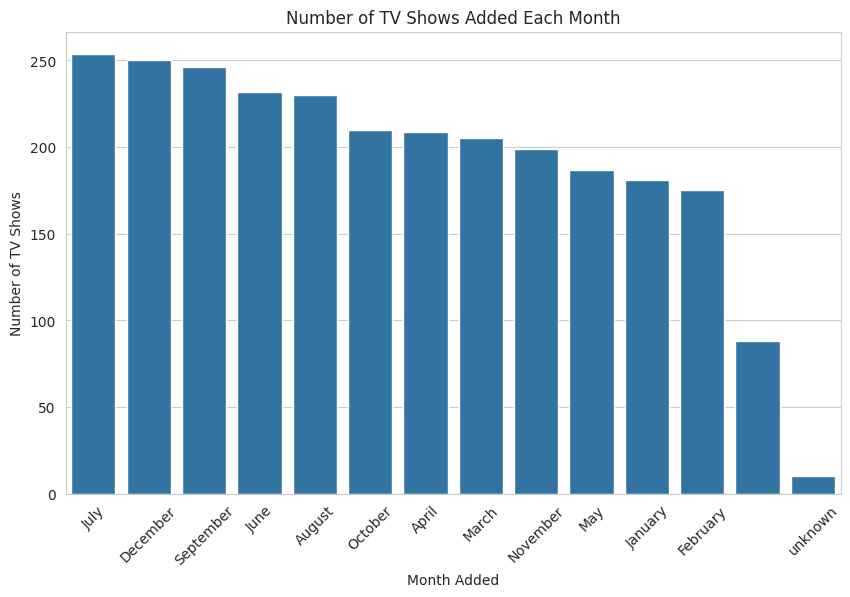

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='month_added', y='count', data=best, order=best['month_added'])
plt.xlabel('Month Added')
plt.ylabel('Number of TV Shows')
plt.title('Number of TV Shows Added Each Month')
plt.xticks(rotation=45)
plt.show()

5. Analysis of actors/directors of different types of shows/movies.

In [ ]:
analysis_dir = df_final[['director','rating','type','title']].copy()
analysis_dir.drop_duplicates(subset=['title'], inplace=True)
analysis_dir.reset_index(drop=True, inplace=True)

analysis_dir = df_final.groupby(['director','rating','type']).size().reset_index(name='count').sort_values(by=['director', 'rating','type'])
movie_shows_dir_df = analysis_dir[analysis_dir['type'] == 'Movie'].copy()
movie_shows_dir_df.drop(movie_shows_dir_df[movie_shows_dir_df['rating'] == 'unknown rating'].index,inplace=True)

movie_shows_dir_df.head(5)

,director,rating,type,count
0,Aaron Moorhead,R,Movie,6
1,Aaron Moorhead,TV-MA,Movie,18
2,Aaron Woolf,TV-14,Movie,2
3,Abbas Alibhai Burmawalla,TV-14,Movie,18
4,Abdullah Al Noor,TV-MA,Movie,30


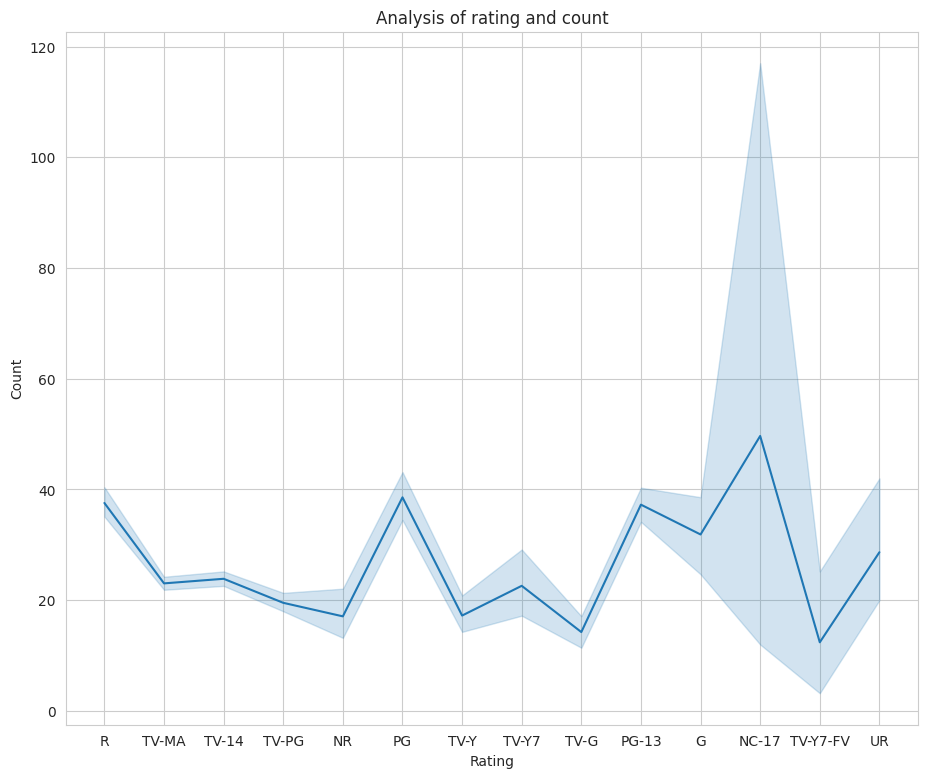

In [ ]:

plt.figure(figsize=(11, 9))
sns.lineplot(x='rating',y='count',data=movie_shows_dir_df)
plt.title('Analysis of rating and count')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

6. Does Netflix has more focus on TV Shows than movies in recent years

In [ ]:

recent_years = df_final[df_final['release_year'] >= 2016]
recent_years = recent_years.drop_duplicates(subset=["title"])
type_counts = recent_years['type'].value_counts()
movie = type_counts.get('Movie', 0)
tv_show = type_counts.get('TV Show', 0)
print(f"Number of movies in recent years: {movie}")
print(f"Number of TV shows in recent years: {tv_show}")

if movie > tv_show:
    print("Netflix has more focus on movies in recent years.")
elif movie < tv_show:
    print("Netflix has more focus on TV shows in recent years.")

Number of movies in recent years: 3619
Number of TV shows in recent years: 2037
Netflix has more focus on movies in recent years.


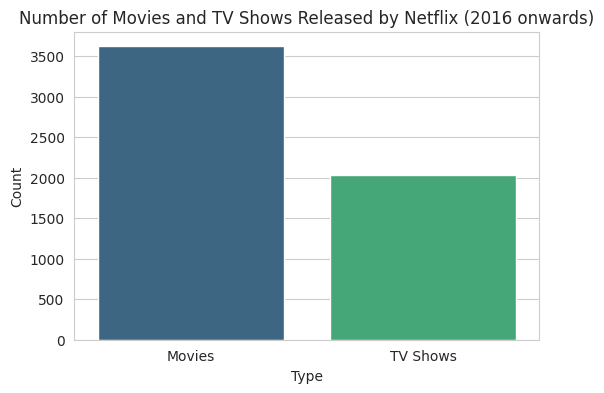

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=['Movies', 'TV Shows'], y=[movie, tv_show], hue=['Movies', 'TV Shows'], palette='viridis', legend=False)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Number of Movies and TV Shows Released by Netflix (2016 onwards)')
plt.show()

7 .Understanding what content is available in different countries

In [ ]:
df_understanding=df_final.groupby(['country'])['listed_in'].value_counts()
df_understanding_1=df_understanding.reset_index(name='counts')
df_understanding_1.sample(5)

,country,listed_in,counts
1053,Venezuela,Documentaries,3
2112,Soviet Union,Action & Adventure,16
1769,Malaysia,Kids' TV,10
102,Brazil,Reality TV,25
1441,France,Thrillers,11


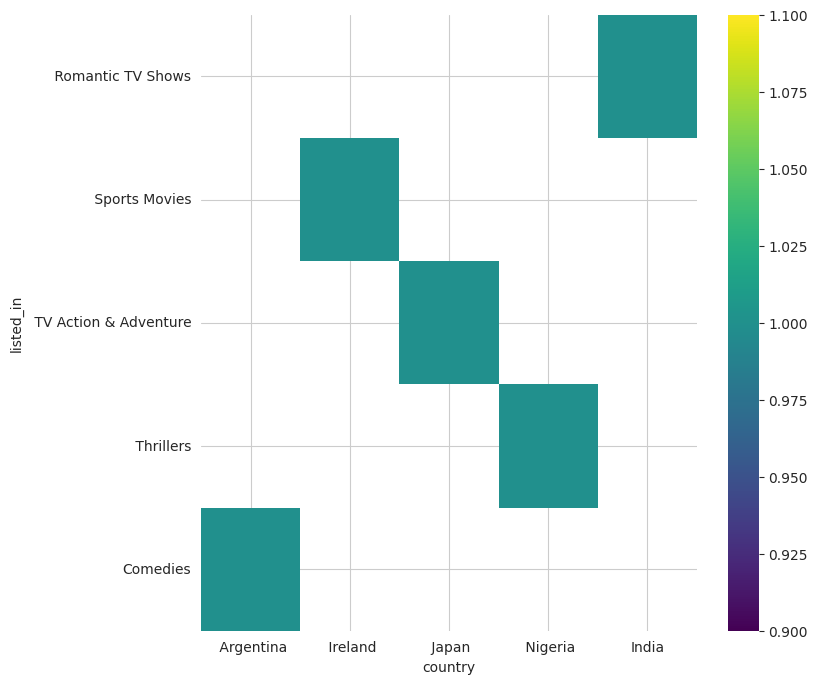

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['listed_in'].value_counts()
    for x_label, grp in _df_4.groupby('country')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('country')
_ = plt.ylabel('listed_in')

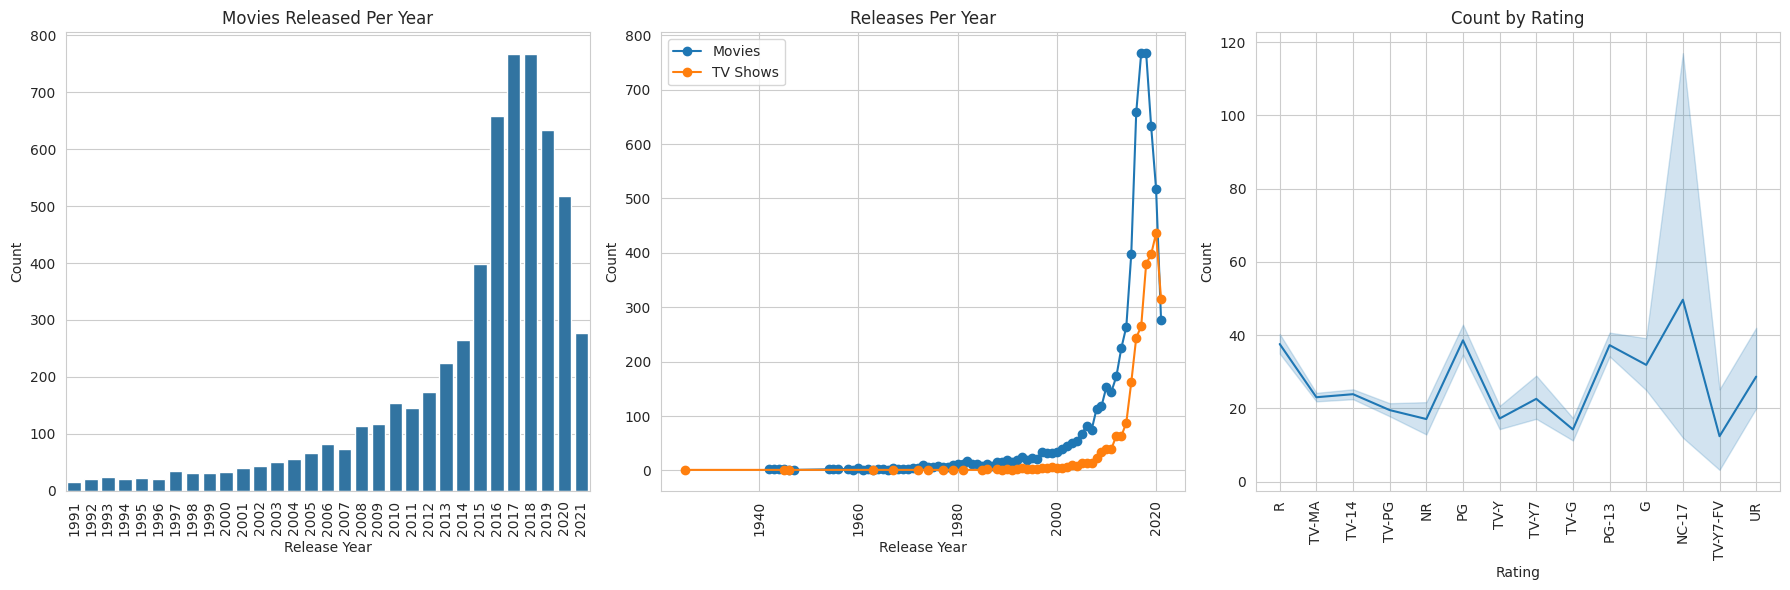

In [ ]:

plt.figure(figsize=(18, 6))


plt.subplot(1, 3, 1)
sns.barplot(x='release_year', y='count', data=movies_yr_df)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Movies Released Per Year')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.plot(movie_shows_df['release_year'], movie_shows_df['count'], label='Movies', marker='o')
plt.plot(tv_shows_df['release_year'], tv_shows_df['count'], label='TV Shows', marker='o')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Releases Per Year')
plt.legend()
plt.xticks(rotation=90)


plt.subplot(1, 3, 3)
sns.lineplot(x='rating', y='count', data=movie_shows_dir_df)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count by Rating')
plt.xticks(rotation=90)


plt.tight_layout()


plt.show()

Box plot for the distribution of movie duration.

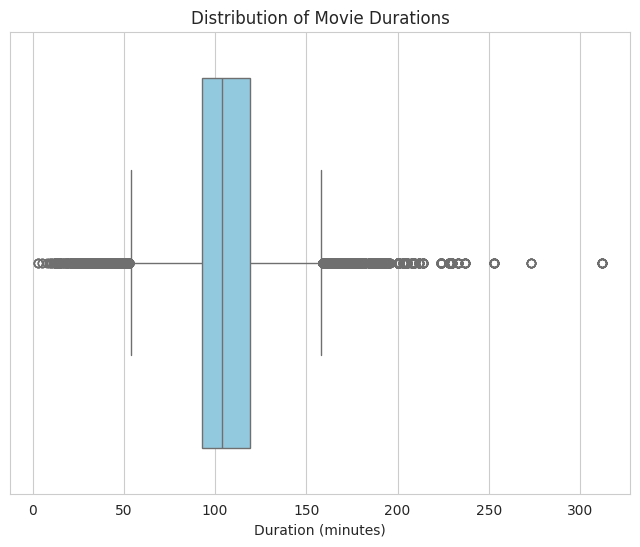

In [ ]:

movies_data = df_final[df_final['type'] == 'Movie'].copy()

movies_data['duration'] = movies_data['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(8, 6))
sns.boxplot(x=movies_data['duration'], color='skyblue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.show()

### 1. *Content Availability in Different Countries*
*Insight:*
- Different countries have access to different types of content, including movies, TV shows, or both.

*Recommendation:*
- *Localization Strategy:* Tailor content offerings to specific countries based on local preferences. For instance, if a country shows a higher preference for TV shows, focus on acquiring or producing more TV shows for that market.
- *Content Diversity:* Ensure a mix of both movies and TV shows in each market to cater to a broader audience and avoid saturating the market with one type of content.

### 2. *Trends in Movie Releases Over the Last 20-30 Years*
*Insight:*
- There is a noticeable trend in the number of movies released over the years, with fluctuations possibly influenced by industry changes and global events.

*Recommendation:*
- *Historical Analysis:* Use historical data to predict future trends in movie releases and plan content acquisition accordingly.
- *Seasonal Releases:* Identify peak times for movie releases and schedule major releases during these periods to maximize viewership.

### 3. *Comparison of TV Shows vs. Movies*
*Insight:*
- There has been a notable difference in the release patterns of movies and TV shows over the years.

*Recommendation:*
- *Content Balance:* Maintain a balance between movies and TV shows to cater to different audience preferences.
- *Genre Analysis:* Analyze popular genres within both categories to optimize content acquisition and production.

### 4. *Best Time to Launch a TV Show*
*Insight:*
- Certain months have higher counts of TV show releases, indicating possibly favorable times for launching new shows.

*Recommendation:*
- *Optimal Release Timing:* Plan the launch of new TV shows during months with historically high viewership to capitalize on audience engagement.
- *Marketing Campaigns:* Align marketing efforts with these optimal times to maximize the impact of new releases.

### 5. *Analysis of Actors/Directors in Different Types of Shows/Movies*
*Insight:*
- Certain directors and actors are associated with specific types of content and ratings.

*Recommendation:*
- *Talent Acquisition:* Focus on collaborating with directors and actors who have a proven track record of success in the type of content Netflix wants to promote.
- *Star Power:* Use well-known actors and directors to attract viewership, especially in new markets or for new content types.

### 6. *Focus on TV Shows vs. Movies in Recent Years*
*Insight:*
- There has been a shift in focus towards TV shows in recent years.

*Recommendation:*
- *Strategic Focus:* If the trend shows a growing interest in TV shows, continue to invest in high-quality TV show production and acquisition.
- *Content Expansion:* Consider expanding the TV show library, including different genres and international TV shows, to cater to diverse tastes.

### 7. *Understanding Content Available in Different Countries*
*Insight:*
- The content available varies significantly between countries, reflecting local tastes and preferences.

*Recommendation:*
- *Localized Content:* Increase investment in local content production and acquisitions to cater to regional preferences.
- *Global Distribution:* Ensure popular content is available globally, with localized subtitles and dubbing to enhance accessibility and viewership.

### General Recommendations:
- *Data-Driven Decisions:* Continuously use data analytics to monitor viewer preferences and trends, enabling more informed decisions about content acquisition and production.
- *User Feedback:* Regularly collect and analyze user feedback to understand their preferences and improve the content library accordingly.
- *Marketing Strategies:* Tailor marketing strategies based on regional insights and viewing habits to maximize engagement and subscription rates.
- *Content Innovation:* Explore new and innovative content formats, such as interactive shows or short-form content, to stay ahead in the competitive streaming market.

By leveraging these insights and recommendations, Netflix can optimize its content strategy to enhance user engagement, satisfaction, and overall market competitiveness.



